Module 3 Assignment - Part 1: ANNs in Keras
---

Use TF/Keras to create a NN that will classify data from this dataset.

# Requirements:

- Use the Digits MNIST dataset, and TF/Keras (Sequential Model) to build an ANN (not a CNN) that has **exactly three** dense layers with the appropriate activation functions. 
- Have at least one dropout layer. 
- You will also need a Flatten layer as well. 
- You may have other layers if you wish.

## Data:
<https://keras.io/api/datasets/mnist/>

**Hint: Data Access**
```
Data = tf.keras.datasets.mnist
```

**Hint2: Code**

<https://gatesboltonanalytics.com/?page_id=888>

Be sure to choose the appropriate optimizer, loss function, and metrics.

To illustrate your work, use your code to create output and visualizations. Then, create a Word Document that takes the reader through the illustrations. These will include a small image of what the raw data looked like. After preparing the data for analysis, include another image of the prepared data (this will include Training data, Training Labels, Testing Data, Testing Labels, Validation Data, and Validation Labels). You can also include an image of what one of the training data matrices looks like - both as a matrix of numbers and as an image, as well as the Label for that data point.

(See the code example to clarify this for yourself)

Next, you will include your first two and last two epochs as well as visualizations for the Loss and Accuracy over all epochs.

Lastly, you will create and will include a Confusion Matrix (pretty) that shows the prediction accuracy of the Test set.

There are many examples in the class (Canvas) that will help you with the above. 

**Warning:** Do not Google this and try to "find it". If you do, it will be clear that you used web code. I would prefer that you review the examples and code that I included and then learned to use Keras to do the above. It is OK to look at web examples but in the end, it is a better learning experience if you understand the code you are writing. (This is especially true when preparing for exams and jobs :))

**Notes:** There are many ways to accomplish the above. The goal is to read the requirements above and then create a solution that meets and exceeds the base expectations. Think about and look at the data. You are using an ANN here so think about why you need to flatten. When in doubt, illustrate more. When you create your document, imagine that you are giving it to a manager. 

When you submit, you will submit your code and you Word Doc. Please only use .py or Jupyter for code and ONLY .docx for the Word Doc. 

---



JK answers:

In [1]:
#libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns

2023-11-26 23:09:29.532997: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-26 23:09:29.599826: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data (Preprocessing, cleaning, etc.)

## Load Data

In [2]:
Data = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = Data.load_data()

## EDA

In [3]:
X_train[:6]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [4]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

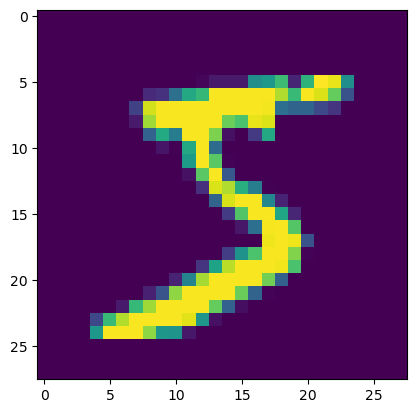

In [6]:
plt.imshow(X_train[0])

In [7]:
y_train[0]

5

### Data Shapes

In [8]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Data preprocessing

### Normalization

Normalize data (not label) from 0 to 1 (i.e. Min-max scale).

***Normalization simplification*** (specific to this case, and perhaps to all image data)

Normally min-max scaling: 

\begin{align*}
x' &= \frac{x - a_{\text{min}}}{a_{\text{max}} - a_{\text{min}}} (n_{\text{max}} - n_{\text{min}}) + n_{\text{min}}
\end{align*}

Where: 

* $x'$: new scaled $x$ value
* $a_{\text{max}}$: actual max value
* $a_{\text{min}}$: actual min value
* $n_{\text{max}}$: new max value to scale to
* $n_{\text{min}}$: new min value to scale to

When scaling from 0 to 1, the formula simplifies to:

\begin{align*}
x' &= \frac{x - a_{\text{min}}}{a_{\text{max}} - a_{\text{min}}} (n_{\text{max}} - n_{\text{min}}) + n_{\text{min}} \\
&= \frac{x - a_{\text{min}}}{a_{\text{max}} - a_{\text{min}}} (1-0) + 0 \\
&= \frac{x - a_{\text{min}}}{a_{\text{max}} - a_{\text{min}}} \\
\end{align*}

And in this case (and perhaps generally for all image data (but be sure to double check)), numeric values representing image data range from 0 to 255. 

So in this case we can simplify min-max normalizing in the following way:

\begin{align*}
x' &= \frac{x - a_{\text{min}}}{a_{\text{max}} - a_{\text{min}}} \\
&= \frac{x - 0}{a_{\text{max}}} \\
&= \frac{x}{a_{\text{max}}}
\end{align*}

The above assumes the minimum value in the data is zero, but still keeps some generalization by not assuming the max value is always 255.

(I'm guessing it may be safe to assume most image data that follows this simplification have max values of 255, but I still wanted to keep some flexibility. I have started to feel uncomfortable hard coding every little thing.)

In [10]:
# check min and max values
print("X_train min:", X_train.min())
print("X_train max:",X_train.max())

X_train min: 0
X_train max: 255


In [11]:
assert X_train.min() == 0   # the following min-max normlization is only effective if the minimum value in the data is zero

# min-max scale from 0 to 1 (as long as original min value was zero)
X_train, X_test = X_train/X_train.max(), X_test/X_train.max()

In [12]:
# preview scaling
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Model

**Reminder of requirements:**

- ANN model with **exactly three** dense layers (with appropriate activation functions)
- Have at least one dropout layer
- Also need a Flatten layer

## Build model

In [13]:
# Construct model
NN_Model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(64, activation='relu'), 
  
  tf.keras.layers.Dropout(0.2),                   
  tf.keras.layers.Dense(10, activation='softmax') 
])
    
NN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


2023-11-26 23:09:33.900861: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (100)


In [14]:
# Compile model
NN_Model.compile(loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"],
                 optimizer='adam'
                 )

## Train Model

In [15]:
hist = NN_Model.fit(X_train,y_train, epochs=30, validation_data=(X_test,y_test))

Epoch 1/30


1875/1875 [==============================] - 10s 5ms/step - loss: 0.2868 - accuracy: 0.9153 - val_loss: 0.1303 - val_accuracy: 0.9582
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1243 - accuracy: 0.9631 - val_loss: 0.1012 - val_accuracy: 0.9689
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0890 - accuracy: 0.9730 - val_loss: 0.0836 - val_accuracy: 0.9746
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0702 - accuracy: 0.9784 - val_loss: 0.0844 - val_accuracy: 0.9742
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0561 - accuracy: 0.9820 - val_loss: 0.0875 - val_accuracy: 0.9750
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0856 - val_accuracy: 0.9759
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0421 - accuracy: 0.9860 - val_loss: 0.0809 - val_accuracy: 0.9776
Ep

## Evaluate Model

## Loss & Accuracy vs. Epochs plots

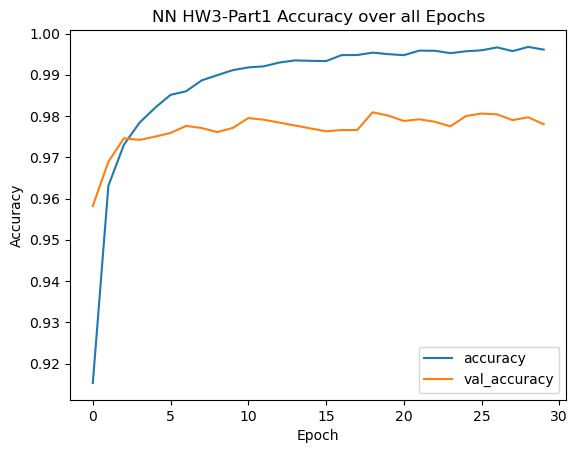

In [26]:
# Accuracy plot
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("NN HW3-Part1 Accuracy over all Epochs")

#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

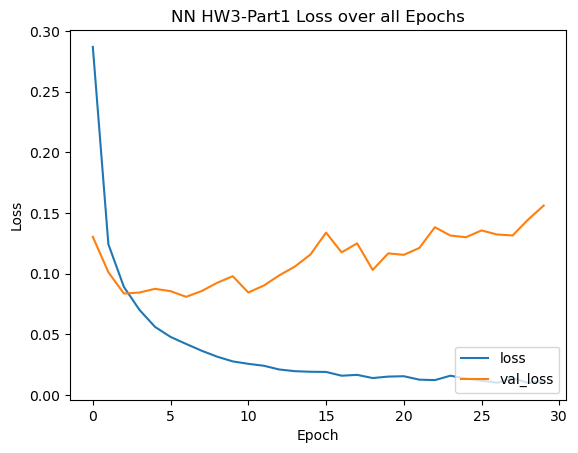

In [27]:
# Loss plot
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("NN HW3-Part1 Loss over all Epochs")
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [18]:
Eval_Loss, Eval_Accuracy = NN_Model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1561 - accuracy: 0.9780


### Test Model with predictions

In [19]:
pred = NN_Model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
# Preview results
i = 0   # index to check
print("Prediction for X_test[{}]:".format(i),pred[i])
print("\n ArgMax (final prediction) for X_test[{}]:".format(i),np.argmax(pred[i]))
print("\n Label for X_test[{}] (y_test[{}]):".format(i,i), y_test[i])

Prediction for X_test[0]: [6.3854554e-23 2.2880131e-20 1.7975410e-20 1.1580782e-17 3.0040163e-20
 1.0337131e-23 3.2074157e-32 1.0000000e+00 1.9476907e-24 2.5626674e-13]

 ArgMax (final prediction) for X_test[0]: 7

 Label for X_test[0] (y_test[0]): 7


## Confusion Matrix

In [21]:
final_pred = np.squeeze(np.array(pred.argmax(axis=1)))   # final prediction (arg-max of pred)

cm = confusion_matrix(final_pred,y_test)
print(cm)

[[ 974    1    4    3    1    4    5    1   12    0]
 [   1 1126    1    0    1    0    3    1    0    3]
 [   0    3 1015    9    3    0    2    9    9    1]
 [   0    0    2  979    0    5    1    1    3    0]
 [   0    0    1    0  957    1    3    0    3    6]
 [   2    0    0    8    0  874    7    0   11    2]
 [   1    2    1    0    5    3  935    0    3    1]
 [   0    1    6    5    2    0    0 1003    2    2]
 [   0    2    1    3    1    2    2    2  924    1]
 [   2    0    1    3   12    3    0   11    7  993]]


Text(0.5, 1.0, 'Confusion Matrix: NN HW3-Part 1')

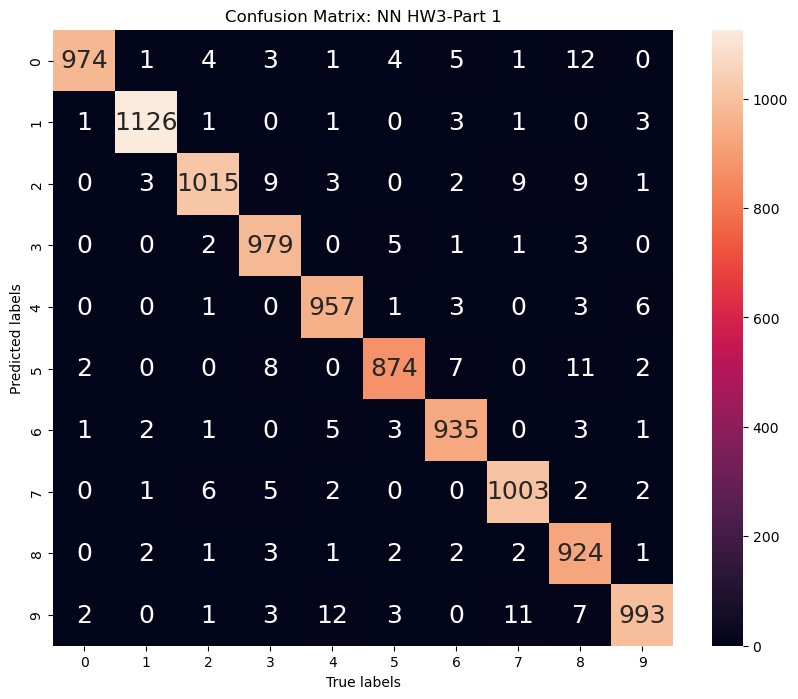

In [28]:
fig, ax = plt.subplots(figsize=(10,8)) 

sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
ax.set_xlabel('True labels') 
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix: NN HW3-Part 1') 